<b style = "font-size: 38px; color:rgb(239, 230, 133);">📝 Project Introduction</b><br><br>
This project aims to develop a deep learning model to predict the likelihood of diabetes in patients based on diagnostic medical data. Using the Pima Indians Diabetes Dataset, we preprocess the data, handle missing values, and train a neural network using TensorFlow/Keras. The goal is to build an accurate binary classification model that can assist in early detection of diabetes and support clinical decision-making.



<b style = "font-size: 38px; color:rgb(239, 230, 133);">1.0 Importing Libraries And Loading Dataset Required For Project Success</b>

In [1]:
#loading
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = 15, 5
import seaborn as sns
sns.set()
import missingno as msno
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam as ad
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
import keras_tuner

In [2]:
#read in dataset and lowercase column names 
df = pd.read_csv("C:/Users/Namshima/Documents/Data science Praticals/diabetes.csv")
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b style = "font-size: 38px; color:rgb(239, 230, 133);">2.0 Early Inspection Of Dataset And Handling Duplicated And Missing Values</b>

In [3]:
#print dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#checking of for missing values 
df.isna().sum().to_frame()

,0
pregnancies,0
glucose,0
bloodpressure,0
skinthickness,0
insulin,0
bmi,0
diabetespedigreefunction,0
age,0
outcome,0


In [5]:
#print count of missing values
len(df[df.duplicated()])

0

In [6]:
#descriptive data analysis
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
col_nan = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
df[col_nan] = df[col_nan].replace(0, np.nan)

<b style = "font-size: 33px; color:rgb(239, 230, 133);">2.1 Handling Missing Values</b>

In [8]:
(df.isna().sum() / len(df) * 100).round(1).sort_values(ascending = False).to_frame('Count')

,Count
insulin,48.7
skinthickness,29.6
bloodpressure,4.6
bmi,1.4
glucose,0.7
pregnancies,0.0
diabetespedigreefunction,0.0
age,0.0
outcome,0.0


### 📌 **The Zero Problem**

In the dataset, certain features like Glucose, BloodPressure, SkinThickness, Insulin and BMI contain zeros.<br>
Medically, it's not possible for a person to have a glucose level or BMI of zero these zeros don't represent actual measurements but indicate missing or unrecorded values. If left untreated, they can mislead the model during training and also give wrong insights during our Exploratory data analysis. Therefore, we replace these zeros with `NaN` to mark them as missing and handle them properly using imputation techniques, ensuring the model learns from realistic and meaningful data and also meaningful insights during EDA.




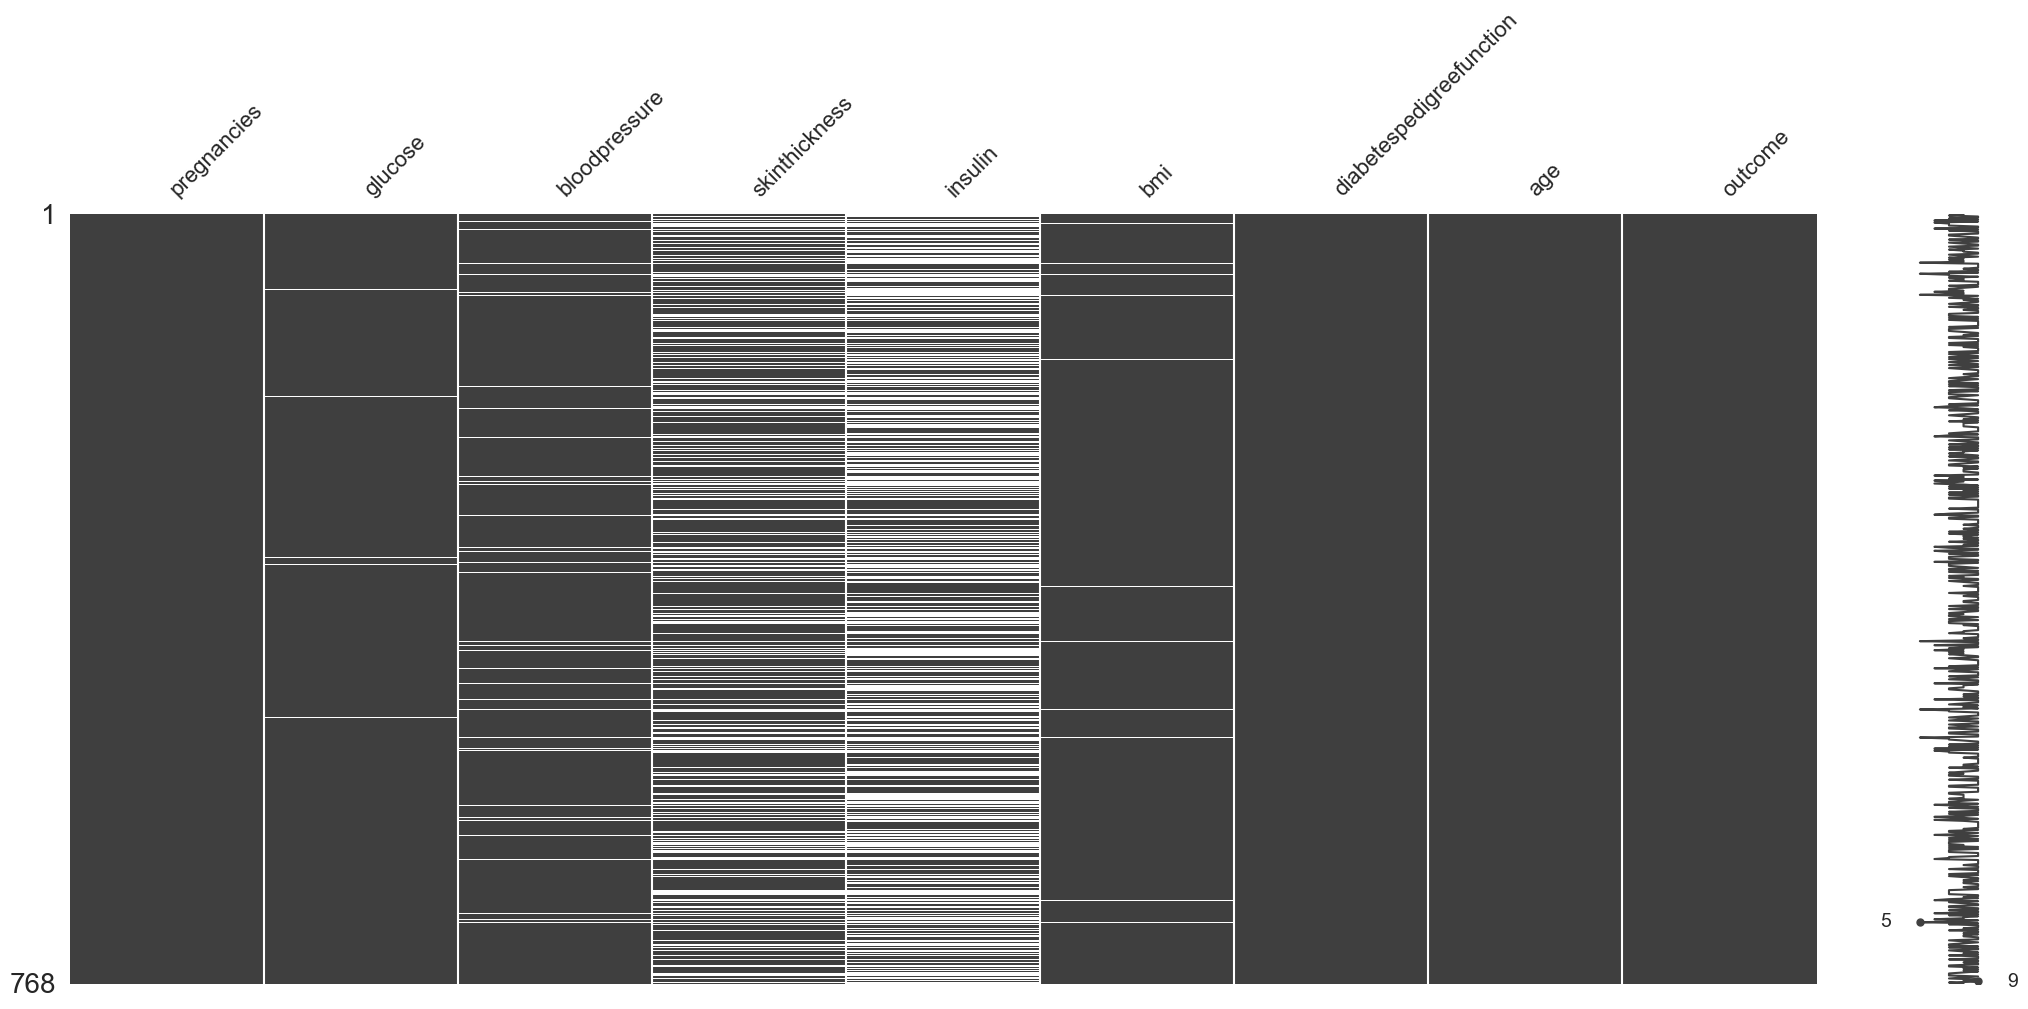

In [9]:
msno.matrix(df)
plt.show()

In [ ]:
#bin and label creation
bins = [df['age'].min() - 1, df['age'].quantile(0.25), df['age'].quantile(0.50), df['age'].quantile(0.75), np.inf]
labels = ['21 - 24', '25 - 29', '30 - 41', '42+']
df['age_range'] = pd.cut(df['age'], bins = bins, labels = labels)

c:\Users\Namshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Namshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Namshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Namshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

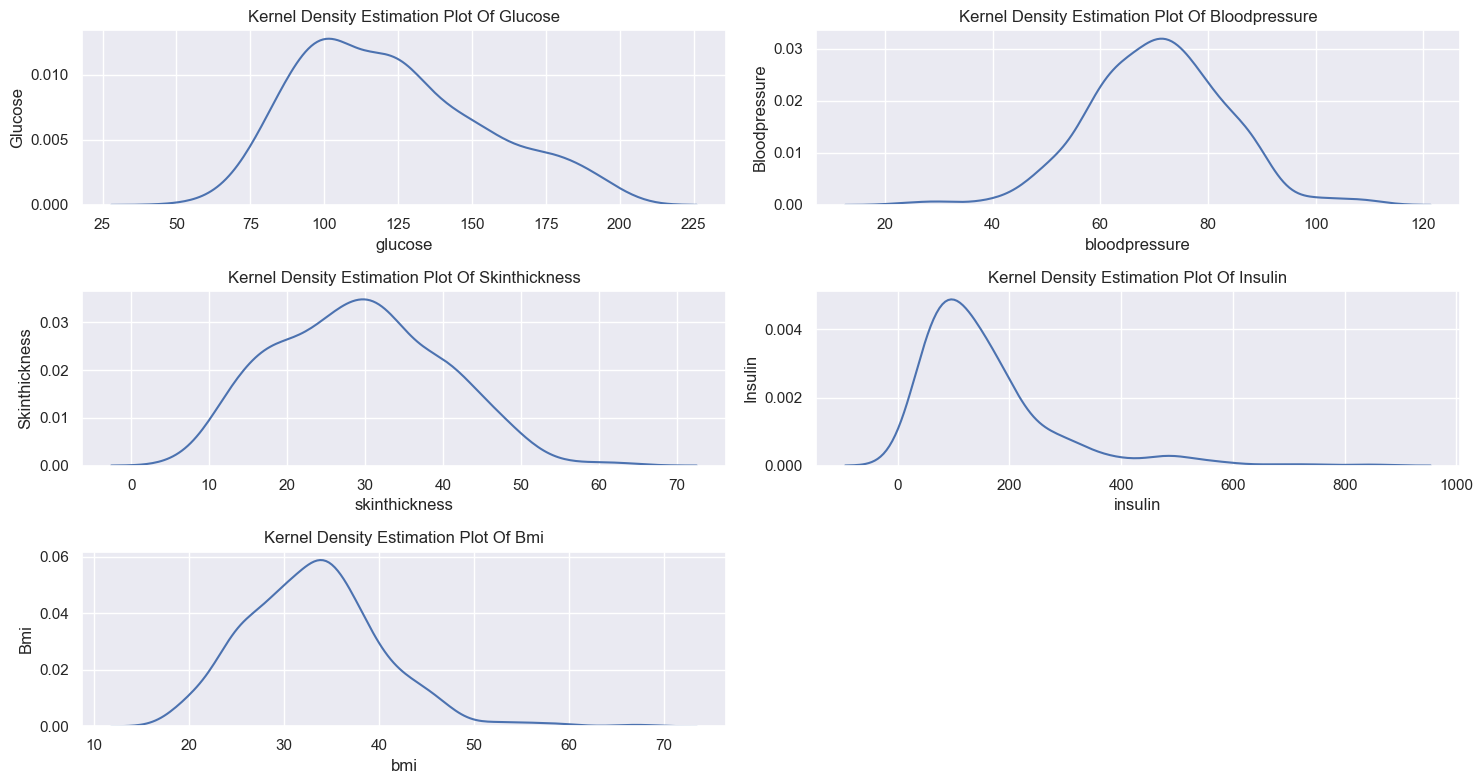

In [ ]:
# visualization
fig, axes = plt.subplots(3, 2, figsize = [15, 8])
axes = axes.flatten()
for i, col in enumerate(col_nan):
    sns.kdeplot(x = col, data = df.dropna(), ax = axes[i])
    axes[i].set_title(f"Kernel Density Estimation Plot Of {col.title()}")
    axes[i].set_ylabel(col.title())
if len(col_nan) < len(axes):
    for j in range(len(col_nan), len(axes)):
        plt.delaxes(axes[j])
plt.tight_layout()        
plt.show()

In [12]:
for col in col_nan:
    df[col] = df.groupby('age_range', observed = True)[col].transform(lambda x: x.fillna(x.median()))

In [13]:
df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
age_range                   0
dtype: int64

<b style = "font-size: 38px; color:rgb(239, 230, 133);">📖 Handling Missing Values: A Targeted, Age-Based Approach</b><br><br>

In medical datasets, missing values are often more than just blank cells, they reflect real-world challenges in data collection. In this dataset, features like **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI** contain biologically implausible values such as 0, which likely indicate missing entries. Leaving them as-is could mislead the model, while replacing them blindly with overall averages may erase important patterns.

### <b>💡 Observational Insight</b>

During exploratory data analysis and additional research, I discovered that **medical indicators vary significantly across age groups**, especially in women. For example:

* Glucose levels tend to increase with age.
* Blood pressure naturally rises over the decades.
* BMI and insulin resistance also shift due to hormonal and metabolic changes.

This means that a 22-year-old and a 50-year-old will likely have very different baseline readings and imputing both with the same global value would be inaccurate.

### <b>🧠 A Smarter Solution: Age-Grouped Median Imputation</b>

To preserve the medical relevance of the data, I decided to:

1. **Create age bins** using quantiles to divide the patients into four age groups:

   * *21–24*, *25–29*, *30–41*, and *42+*
2. **Replace the zero values with `NaN`** to explicitly mark them as missing.
3. **Calculate the median** of each skewed feature within each age group.
4. **Impute missing values** with the median from their corresponding age range.

This approach ensures that each imputed value is grounded in the typical range for that person's age group, improving both the quality of the dataset and the reliability of any model built on it.

### <b> ✅ Why This Matters</b>

This strategy:

* **Respects natural biological variation**
* **Avoids distortion from skewed data**
* **Leads to more accurate predictions** by grounding imputations in meaningful groupings

In summary, instead of using a one-size-fits-all solution, I used **age as a context variable** to guide my imputations a decision backed by both domain knowledge and data analysis.


<b style = "font-size: 38px; color:rgb(239, 230, 133);">3.0 🤖Machine Learning</b>

<b style = "font-size: 28px; color:rgb(239, 230, 133);">3.1 🛠️ Feature Transformation</b>

In [14]:
x = df.drop(['age_range', 'outcome'], axis = 1)
y = df['outcome']

In [15]:
scaler = StandardScaler()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

In [17]:
x_train_scaled = scaler.fit_transform(x_train)

In [18]:
x_test_scaled = scaler.transform(x_test)

In [19]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (x_train_scaled.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


c:\Users\Namshima\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
monitor = EarlyStopping(monitor = 'val_loss', patience = 5) 

In [22]:
model.fit(x_train_scaled, y_train, validation_split = 0.2, callbacks = [monitor])

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6470 - loss: 0.6638 - val_accuracy: 0.6504 - val_loss: 0.6131


In [23]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6583 - loss: 0.6035


<b style = "font-size: 38px; color:rgb(239, 230, 133);">3.1 Hyper-Parameter Tunning</b>

In [ ]:
#create model
def create_model(num_neurons = 16, activation = 'relu', optimizer = 'adam', learning_rate = 0.001):
    model = Sequential()
    model.add(Dense(num_neurons, activation = activation, input_shape = (x_train.shape[1],)),)
    model.add(Dense(num_neurons, activation = activation,))
    model.add(Dense(num_neurons, activation = activation,))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [25]:
def create_model(hp):

    model = Sequential()
    model.add(Dense(units = hp.Int('units1', min_value = 10, max_value = 70, step = 6), activation = hp.Choice('activation1', values = ['relu', 'leaky_relu', 'tanh']), input_shape = (x_train_scaled.shape[1], )))
    model.add(Dense(units = hp.Int('units2', min_value = 10, max_value = 70, step = 6), activation = hp.Choice('activation2', values = ['relu', 'leaky_relu', 'tanh'])))
    model.add(Dense(1, activation = 'sigmoid'))

    learning_rate = hp.Choice('Learning Rate', values = [0.01, 0.02, 0.03])
    model.compile(optimizer = ad(learning_rate = learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [26]:
tuner = keras_tuner.Hyperband(
    create_model,
    objective = 'val_accuracy',
    factor = 3,
    max_epochs = 30, 
    directory = 'my_dir',
    project_name = 'diabetes_HB2'
    )

In [27]:
tuner.search(x_train_scaled, y_train, callbacks = [monitor], validation_split = 0.2, epochs = 50)

Trial 90 Complete [00h 00m 05s]
val_accuracy: 0.772357702255249

Best val_accuracy So Far: 0.8048780560493469
Total elapsed time: 00h 06m 47s


In [28]:
best_hyps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [30]:
print(f"Best Number Of Neurons For Hidden Layer One: {best_hyps.get('units1')}")
print()
print(f"Best Number Of Neurons For Hidden Layer Two: {best_hyps.get('units2')}")
print()
print(f"Best Number Of Activation For Hidden Layer One: {best_hyps.get('activation1')}")
print()
print(f"Best Number Of Activation For Hidden Layer Two: {best_hyps.get('activation2')}")
print()
print(f"Best Learning Reate: {best_hyps.get('Learning Rate')}")

Best Number Of Neurons For Hidden Layer One: 16

Best Number Of Neurons For Hidden Layer Two: 40

Best Number Of Activation For Hidden Layer One: leaky_relu

Best Number Of Activation For Hidden Layer Two: relu

Best Learning Reate: 0.01


In [31]:
model = tuner.hypermodel.build(best_hyps)

c:\Users\Namshima\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train_scaled, y_train, epochs = 65, validation_split = 0.2, callbacks = [monitor])

Epoch 1/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6974 - loss: 0.5908 - val_accuracy: 0.7967 - val_loss: 0.5009
Epoch 2/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8079 - loss: 0.4417 - val_accuracy: 0.7561 - val_loss: 0.5378
Epoch 3/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7770 - loss: 0.4387 - val_accuracy: 0.7805 - val_loss: 0.5399
Epoch 4/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7655 - loss: 0.4468 - val_accuracy: 0.7642 - val_loss: 0.5377
Epoch 5/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7929 - loss: 0.3832 - val_accuracy: 0.7724 - val_loss: 0.5463
Epoch 6/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8014 - loss: 0.4125 - val_accuracy: 0.7398 - val_loss: 0.5449
Epoch 7/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7862 - loss: 0.4146 - val_accuracy: 0.7805 - val_loss: 0.5361
Epoch 8/65
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7778 - loss: 0.4224 - val_accuracy: 0.7561 - v

In [40]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(f"Best Epoch: {best_epoch}")

Best Epoch: 1


In [41]:
hyp_model = tuner.hypermodel.build(best_hyps)

c:\Users\Namshima\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
hyp_model.fit(x_train_scaled, y_train, epochs = best_epoch, callbacks = [monitor], validation_split = 0.2)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6371 - loss: 0.6118 - val_accuracy: 0.7724 - val_loss: 0.5347


In [47]:
test_eval = hyp_model.evaluate(x_test_scaled, y_test)
print('[Test Loss, Test Accuracy, ]', test_eval)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7914 - loss: 0.4667
[Test Loss, Test Accuracy, ] [0.47724825143814087, 0.7792207598686218]


In [48]:
train_eval = hyp_model.evaluate(x_train_scaled, y_train)
print('[Train Loss, Train Accuracy, ]', train_eval)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7621 - loss: 0.4746
[Train Loss, Train Accuracy, ] [0.4768202602863312, 0.7703583240509033]
